# Bayesian statistics

#### Derivation of Bayes theorem:
Derivation:

We have two parameters $A$ and $B$. For two given values we have $P(A,B)$ as the probability that both of those values are the true of A and B.

We start with the intuitive statement $$P(A,B) = P(A|B)P(B).$$

But since $P(A,B) = P(B,A)$ it must follow that
$$P(A|B)P(B) = P(B|A)P(A),$$

which leads to Bayes theorem

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)},$$

usually written as 

$$P(A|B)  \propto P(B|A)P(A)$$

with $P(B)$ as a normalization constant to make sure that $\int_A P(B|A')P(A')dA' = 1$





#### Bayesian Linear Regression

We have a dataset $D = \{d_1, d_2, .., d_N\}$ that are measurements of value $y$ that is a function of a parameter vector $\vec{x}$. In other words $d_i = y(\vec{x}_i | \boldsymbol{\theta})$.

$D$ and $X=\{\vec{x}_1, \vec{x}_2, .., \vec{x}_N\}$ are known, and we want to find the function $y$, meaning we need to find its parameters $\boldsymbol{\theta}$ (if the shape/form of $y$ is assumed, otherwise we'd need to find the shape as well). 

In regular regression, one is only interested in the value for $\boldsymbol{\theta}$ that maximizes the probability of getting the obtained data, i.e.

$$
\hat{\boldsymbol{\theta}} = \underset{\boldsymbol{\theta}}{\text{argmax}} P(D|\boldsymbol{\theta})
$$

The factor $P(D|\boldsymbol{\theta})$ is called the _likelihood function_ and describes the probability of getting the data $D$ if the given hypothesis $\boldsymbol{\theta}$ is true. $\hat{\boldsymbol{\theta}}$ is known as the MLE (maximum likelihood estimate).  But this is just a point estimate and gives no information about the robustness of the estimate, i.e. how much the probability changes by moving to other points that are close to $\hat{\boldsymbol{\theta}}$ in parameter space.

This is something we can get with Bayesian linear regression.


Any parameter configuration $\boldsymbol{\theta}$ is a unique hypothesis for the model.
For any given $\boldsymbol{\theta}$, we want to know the probability of that hypothesis being true from the data, described as

$$
P(\boldsymbol{\theta}|D).
$$

We can then use Bayes theorem to get
$$ P(\boldsymbol{\theta}|D)  \propto {P(D|\boldsymbol{\theta})P(\boldsymbol{\theta})}.$$

The factor $P(\boldsymbol{\theta})$ is called the __prior distribution__  for the hypothesis, meaning the probability estimate for hypothesis $\boldsymbol{\theta}$ being true prior to seeing the data. If we have the likelihood and the prior, then we can create $P(\boldsymbol{\theta}|D)$ which known as the __posterior distribution__.






### Bayesian Ridge Regression

To get the shape of the posterior distribution, we need to specify the likelihood and the prior. This is of course problem dependent.

#### Choosing the Likelihood
It is common to make the assumption that the data is __iid__ (identically and independently distributed).

The likelihood can then be modelled as 
$$
p(D|\boldsymbol{\theta}) = p(d_1|\boldsymbol{\theta})p(d_2|\boldsymbol{\theta})..p(d_N|\boldsymbol{\theta})
$$
where 
$$
p(d_i|\boldsymbol{\theta}) = \mathcal{N}(\vec{w}^T\vec{x}_i, \sigma^2).
$$

Where $\boldsymbol{\theta} = \{\vec{w}, \sigma^2\}$. The Gaussian is commonly used because this is the probability distribution with the highest entropy for iids. In other words, if the data is iid, the Gaussian is the _most probable way for the data to be distributed_. 

#### Choosing the Prior
If we can assume that a less complex version of $y$ is more probable than a highly complex one, we can model that using a Gaussian prior.

Bayesian Occams razor > Gaussian prior

For the prior it 


# Classifying phases of the Ising model with Bayesian regression


Different way to formulate regression than usual:

$ P(y|\boldsymbol{x},\boldsymbol{\theta}) = \mathcal{N}(y|\boldsymbol{w}^T\boldsymbol{x}, \sigma^2)$

$\boldsymbol{\theta}$ represents the set of parameters.

In other words, for every point $y(x)$ on the regression line, there is a gaussian distribution of data with center (mean) on $y$ with variance $\sigma^2$.



### Bayesian formulation of Ridge regression: 
Gaussian likelihood (iid assumption)

$$
p(D|\boldsymbol{\theta}) = p(d_1|\boldsymbol{\theta})p(d_2|\boldsymbol{\theta})..p(d_N|\boldsymbol{\theta})
$$
where
$$
p(d_i|\boldsymbol{\theta}) = \mathcal{N}(w^Tx_i, \sigma^2)
$$

with a Gaussian prior

$$
p(w_j) = \mathcal{}
$$


This is equivalent to regression with l2 regularization


Here the datapoints d_i are energy values for the given ising state x_i.






Difference between Bayesian and classical approach to statistics:
Classical:
    Frequentist. Probability represents empirical ratio of event / possible events
    The data is the stochastic elements, the parameter is fixed.
    Suffers from a number of pathologies
    
Bayesian:
    Probability represents OUR uncertainty.
    The data isn't the stochastic element, but our parameter estimate is
    Uses a prior, representing that one usually has prior information
    or the prior can represent complete ignorance
    
   
 
Various regularization schemes are mathematically equivalent to using certain priors


Bayesian linear regression:
    Full posterior p(w,sigma|D), meaning we get the knowledge of how vectors w' in the neighbourhood of w compares, and we also get the posterior over sigma^2 meaning we get to know how reliable the estimation is!
    But can we not just get that from the empirical variance in the data?
    
    Can provide a certainty estimate, eg. credible interval or highest posterior density region. We will use the latter. 
        what is this when doing linear regression?
        
       
    Gaussian prior is equivalent to L2 regularization in classical statistics
    
    Bayesian model selection for linreg?
    
    gives uncertainty estimates both for the w and y
    

"In most statistical situations
(excluding game theoretic ones), assuming nature is an adversary is not a reasonable assumption." 



Ha med forklaringen for hvordan bayesisk tenkning kan brukes til å si f.eks. noe om utenomjordisk liv




# Bayesian linear regression

### The 1D ising model

We randomly generate $N$ states of the 1D ising model (meaning N 1D vectors consisting of -1s and 1s) and calculate their energies using the following Hamiltonian:
$$
H[\vec{S^i}] = - J\sum_{j=1}^LS_j^i S_{j+1}^i
$$
Where $S_j^i$ is the j'th element of the i'th state $\vec{S^i}$. We set the value $J=1$.

We will then try to see if we can re-extract this Hamiltonian from the data using Bayesian Linear regression.

### Producing 1D Ising data:

In [1]:
import numpy as np
import scipy.sparse as sp
np.random.seed(12)


import warnings
# Comment this to turn on warnings
warnings.filterwarnings('ignore')

### define Ising model aprams
# system size
L=40

# create 10000 random Ising states
states=np.random.choice([-1, 1], size=(900,L))

def ising_energies(states):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    L = states.shape[1]
    J = np.zeros((L, L),)
    for i in range(L): 
        J[i,(i+1)%L]=-1.0 # interaction between nearest-neighbors
        
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)

    return E
# calculate Ising energies
energies=ising_energies(states)

### Remapping data for regression

We pretend that we're ignorant about the Hamiltonian used to generate the above data. That means that the values aren't the only unknowns, but the shape of it as well. So we need to consider the all-to-all Hamiltonian

$$
H_{model}[\vec{S^i}] = - \sum_{j=1}^L\sum_{k=1}^L J_{j,k}S_j^iS_{k}^i
$$

We see that the actual Hamiltonian we used above is just a special case of this, with $J_{j,k} = \delta_{j,k+1}$.



Taking the outer product

$\vec{\mathbf{x}} \rightarrow \phi(\vec{\mathbf{x}})=\vec{\mathbf{x}}\otimes \vec{\mathbf{x}}$

then we make the vector $\phi(\vec{\mathbf{x}})$ one-dimensional

In [2]:
new_states = np.einsum('bi,bo->bio',states,states)
new_states = new_states.reshape(new_states.shape[0],-1)

## When $\sigma^2$ is assumed: 

In [3]:
import time
from sys import exit
t0 = time.time()


n = new_states.shape[0]   # number of data
D = new_states.shape[1]   # data dimension

# Prior:
variance = 1
w0 = np.zeros(D)
tau = 1 # 1 means unitary gaussian
V0 = tau**2*np.identity(D)  # precision matrix of prior
V0_inv = np.linalg.inv(V0)


X = new_states # data matrix with data as rows
y = energies


VN_inv = V0_inv + np.dot(X.T,X) / variance
VN = np.linalg.inv(VN_inv)

wN = np.dot(np.dot(VN,V0_inv),w0) + np.dot(np.dot(VN,X.T),y) / variance
t1 = time.time()-t0

print(t1)

10.76935863494873


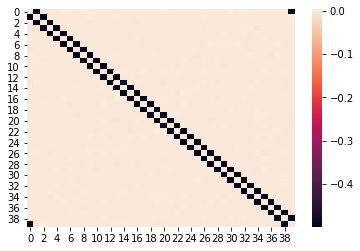

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.heatmap(wN.reshape(40,40))
plt.show()
#plt.imshow(wN.reshape(40,40))
#plt.show()

Gir mening at den fordeler verdiene i w sånn, fordi 0.5^2 + 0.5^2 er mindre enn 1^2 + 1^2 

Det at Lasso er mer riktig er ikke fordi den henter det ut fra dataen, men pga. prioren.

Men er variansen 0 her egentlig?


### Test data




In [5]:
test_states=np.random.choice([-1, 1], size=(300,L))
# calculate Ising test energies
test_energies=ising_energies(test_states)

# remapping states:
test_states = np.einsum('bi,bo->bio',test_states,test_states)
test_states = test_states.reshape(test_states.shape[0],-1)

predicted_energies = np.dot(test_states, wN)


### R^2 - coefficient of determination
y_true_avg = np.mean(test_energies)
residuals = predicted_energies - test_energies
u = np.dot(residuals,residuals)
v = test_energies - y_true_avg
v = np.dot(v,v)

R_squared = 1 - u/v

print(R_squared)


0.9998383177596152


## When $\sigma^2$ is not assumed:

## The 2d Ising model
### Loading Ising model data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

def read_t(t,root="/home/samknu/MyRepos/MLProjectIsingModel/data/IsingData/"):
    data = pickle.load(open(root+'Ising2DFM_reSample_L40_T=%.2f.pkl'%t,'rb'))
    return np.unpackbits(data).astype(int).reshape(-1,1600)

temperatures = np.arange(0.25, 4., step=0.25)   